In [16]:
import numpy as np
import sympy as smp
from sympy import symbols, Eq, solve
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate
import matplotlib
from uncertainties import ufloat
from uncertainties.umath import *
from uncertainties import unumpy
import uncertainties

In [254]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

# blbosti

In [281]:
def mean(arr):
    return np.mean(arr)

def error(x):
    return x.std() / np.sqrt(x.size)

def weighted_error(x, err):
    
    x = np.asarray(x)
    err = np.asarray(err)
    
    average = np.sum(x/(err**2))/np.sum(1/err**2)
    
    average_error = 1/np.sqrt(np.sum(1/err**2))
    
    return average, average_error

def decimal(x):
    return x.replace(',', '.').encode()

def sum_err(x,sx):
    return np.sum(x),np.sqrt(np.sum([np.sum(i**2) for i in sx])) 

def diff_err(x,sx):
    return x[0]-x[1],np.sqrt(np.sum([np.sum(i**2) for i in sx])) 

def times_err(x,sx):
    return np.prod(x), np.prod(x)*np.sqrt(np.sum([np.sum((i/j)**2) for i,j in zip(sx,x)]))

#def frac_err(x,sx):
#    return x[0]/x[1], x[0]/x[1]*np.sqrt(np.sum((sx/x)**2))

def frac_err(x,sx):
    return x[0]/x[1], x[0]/x[1]*np.sqrt(np.sum([np.sum((i/j)**2) for i,j in zip(sx,x)]))
    #return [np.sum((i/j)**2) for i,j in zip(sx,x)]

# UKOL 1

In [17]:
R0 = 0.3

#U = np.array([5.36, 2.15, 7.12, 3.59, 7.32, 3.3,1.8,6.3,9,5.45])
#I = np.array([5.35, 3.2, 6.29, 4.29, 6.38, 4.08,2.94,5.87,6.7,5.39])


U = np.array([5.36, 2.15, 7.12, 3.59, 7.32, 3.3,1.8,6.3,5.45])
I = np.array([5.35, 3.2, 6.29, 4.29, 6.38, 4.08,2.94,5.87,5.39])
R = U/I
P = U*I


p = np.array([0.2079/(1000**4),-1.8517/(1000**3),7.826/(1000**2),19.274/1000,-0.968])

rho20 = np.polyval(p, 21+273.15)
ls = R0/rho20
rho = R/ls
rho

array([17.80994182, 11.94372993, 20.12244927, 14.87608494, 20.39585404,
       14.37822481, 10.88370264, 19.07892678, 17.97459982])

In [18]:
Uu = unumpy.uarray(U,0.1)
Iu = unumpy.uarray(I,0.1)
Ru = Uu/Iu
Pu = Uu*Iu

sR = np.array([uncertainties.std_dev(i) for i in Ru])
sP =  np.array([uncertainties.std_dev(i) for i in Pu])

sR

array([0.02645861, 0.03764835, 0.0240128 , 0.03039509, 0.02385526,
       0.03152341, 0.03988222, 0.02499023, 0.02638417])

In [19]:
print("Rho20: ", rho20)
print("l/s: ", ls)

Rho20:  5.333014294425794
l/s:  0.056253365064775435


In [20]:
T = []
for i in range(9):
    T.append(np.real(np.roots(p - np.array([0,0,0,0,rho[i]]))[3]))
    
T = np.array(T)
T0 = 21+273.15
T

array([772.4348802 , 558.8197838 , 852.81622415, 667.54387157,
       862.20020172, 649.37977035, 518.39486023, 816.77349029,
       778.22095078])

In [21]:
def linear(x,a,b):
    return a*x+b

params,err = curve_fit(linear, T**4, P)

beta, c = params
sbeta, sc = np.sqrt(np.diag(err))
(beta, sbeta),(c, sc)

((8.68914921991155e-11, 1.0427069518405857e-12),
 (-1.7059602080396992, 0.3695209283079817))

In [22]:
tab = np.array([U,I,R,P,rho,T]).round(2).T

print(tabulate(tab, tablefmt="latex_booktabs"))

\begin{tabular}{rrrrrr}
\toprule
 5.36 & 5.35 & 1    & 28.68 & 17.81 & 772.43 \\
 2.15 & 3.2  & 0.67 &  6.88 & 11.94 & 558.82 \\
 7.12 & 6.29 & 1.13 & 44.78 & 20.12 & 852.82 \\
 3.59 & 4.29 & 0.84 & 15.4  & 14.88 & 667.54 \\
 7.32 & 6.38 & 1.15 & 46.7  & 20.4  & 862.2  \\
 3.3  & 4.08 & 0.81 & 13.46 & 14.38 & 649.38 \\
 1.8  & 2.94 & 0.61 &  5.29 & 10.88 & 518.39 \\
 6.3  & 5.87 & 1.07 & 36.98 & 19.08 & 816.77 \\
 5.45 & 5.39 & 1.01 & 29.38 & 17.97 & 778.22 \\
\bottomrule
\end{tabular}


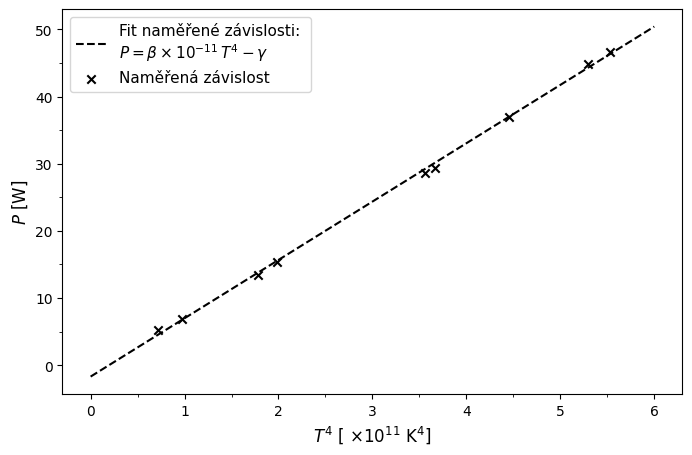

In [8]:
x_range = np.linspace(0,6*10**11,100)

plt.figure(figsize = (8,5))


plt.scatter(T**4/10**11,P,color = 'k',marker='x',label = 'Naměřená závislost')
plt.plot(x_range/10**11,beta*x_range + c, color = 'k', linestyle = 'dashed', label = "Fit naměřené závislosti: \n" + r"$ P = \beta \times 10^{-11} \, T^4 - \gamma$")
#plt.errorbar(T**4/10**11,P, yerr=sP ,elinewidth=.8, fmt = 'kx', linestyle = None, ecolor = "k",capsize=3, label = 'Naměřená závislost', zorder = 88)


#plt.legend(loc='upper right', fontsize=11)

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left', fontsize=11)


plt.ylabel("$P$ " + "[W]", fontsize=12)
plt.xlabel(r"$T^4$ [ $\times 10^{11}$ K$^4$]", fontsize=12)

plt.xticks(np.arange(0,6,.5), minor=True)
plt.yticks(np.arange(0,50,5), minor=True)

plt.savefig('cejchovani.pdf', bbox_inches = 'tight')
plt.show()

In [9]:
def resistance(dT,a):
    return R0*(a*dT+1)

params,err = curve_fit(resistance, T-T0, R, sigma=np.full(len(R), 0.15), absolute_sigma=True)

alfa, = params
salfa, = np.sqrt(np.diag(err))
(alfa, salfa)

(0.004894475801102937, 0.0003772159134545362)

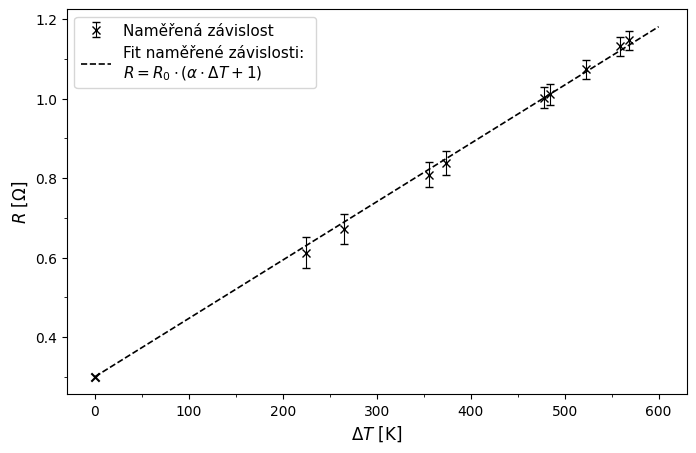

In [10]:
x_range = np.linspace(0,600,100)

plt.figure(figsize = (8,5))


#plt.scatter(T-T0,R,color = 'k',marker='x',label = 'Naměřená závislost')
plt.scatter(0,R0,color = 'k',marker='x')
plt.plot(x_range,resistance(x_range,alfa),lw = 1.2, color = 'k', linestyle = 'dashed', label = "Fit naměřené závislosti: \n" + r"$ R = R_0 \cdot (\alpha \cdot \Delta T + 1)$")
plt.errorbar(T-T0,R, yerr=sR ,elinewidth=.8, fmt = 'kx', linestyle = None, ecolor = "k",capsize=3, label = 'Naměřená závislost', zorder = 88)


#plt.legend(loc='upper right', fontsize=11)

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left', fontsize=11)


plt.xticks(np.arange(0,600,50), minor=True)
plt.yticks(np.arange(0.3,1.2,.1), minor=True)

plt.ylabel("$R$ " + "[$\Omega$]", fontsize=12)
plt.xlabel(r"$\Delta T$ [K]", fontsize=12)

plt.savefig('alfa.pdf', bbox_inches = 'tight')
plt.show()

In [11]:
rho = (U/I)/P # -> Do polynomu, ziskam teplotu



T = None # z toho polynomu

P = U*I





In [1]:
## FIT - konstanta umernosti P a T^4

In [ ]:
## PLOT - kalibracni krivka 

# UKOL 2

In [294]:
U2 = np.array([5.62,4.01, 4.82])
I2 = np.array([5.49,4.54, 5.04])
P2 = U2*I2

T2 = 100
'''T1 = np.array([
[87,78,74,74, 73, 79, 81, 85, 100, 100.4],
[16,13,11,14,18,21,23,27,32,35],
[45,29,33,38,45,46,50,53,63,61]
])'''
T1 = np.array([
[78,74,74, 73, 79, 81, 85, 100],
[13,11,14,18,21,23,27,32],
[29,33,38,45,46,50,53,63]
])

lamb = np.array([430,470,500,530,570,610,660,720])*10**(-9)

temp = np.sqrt(np.sqrt(P2/beta))
#temp

#temp_real = T1 * np.array([[10,100,1000]]).T
#temp_real = T1/100 * np.array([temp]).T
#temp_real


In [314]:
tab = np.array([np.arange(3,11),lamb*10**9])

print(tabulate(tab, tablefmt="latex_booktabs"))

\begin{tabular}{rrrrrrrr}
\toprule
   3 &   4 &   5 &   6 &   7 &   8 &   9 &  10 \\
 430 & 470 & 500 & 530 & 570 & 610 & 660 & 720 \\
\bottomrule
\end{tabular}


In [295]:
U2u = unumpy.uarray(U2,0.1)
I2u = unumpy.uarray(I2,0.1)
P2u = U2u*I2u

In [296]:
h = 6.626 * 10**(-34)
c = 299792458
k = 1.380649 *10**(-23)

Int0 = (2*h*c**2/lamb**5) * 1/(np.exp(h*c/(lamb*k*temp[0]))-1)
Int1 = (2*h*c**2/lamb**5) * 1/(np.exp(h*c/(lamb*k*temp[1]))-1)
Int2 = (2*h*c**2/lamb**5) * 1/(np.exp(h*c/(lamb*k*temp[2]))-1)


In [297]:
Int0 = Int0 / (T1[0]/100)
Int1 = Int1 / (T1[1]/100)
Int2 = Int2 / (T1[2]/100)

In [272]:
def hnus(l,tep):
    return (2*h*c**2/l**5) * 1/(np.exp(h*c/(l*k*tep))-1)

In [273]:
params,err = curve_fit(hnus, lamb, Int0, p0 = [1000])

t1, = params
st1, = np.sqrt(np.diag(err))
(t1, st1)

(772.0630636125053, 0.28903316962840175)

In [274]:
params,err = curve_fit(hnus, lamb, Int1, p0 = [1000])

t2, = params
st2, = np.sqrt(np.diag(err))
(t2, st2)

(703.7322704759953, 0.07569175698920556)

In [275]:
params,err = curve_fit(hnus, lamb, Int2, p0 = [1000])

t3, = params
st3, = np.sqrt(np.diag(err))
(t3, st3)

(739.6597011704365, 0.1893510709348573)

In [276]:
P2u

array([30.853800000000003+/-0.7856494129062912,
       18.2054+/-0.6057367414974925,
       24.292800000000003+/-0.6973808141897797], dtype=object)

In [312]:
x_range = np.linspace(400,750,500)

plt.figure(figsize = (8,5))


#plt.scatter(T-T0,R,color = 'k',marker='x',label = 'Naměřená závislost')
plt.scatter(lamb*10**9,Int0,color = 'navy',marker='x', zorder = 6666, label = 'Závislost pro výkon $P = (30.9 \pm 0.8)$ W')
plt.plot(x_range,hnus(x_range/10**9,t1),lw = 1.2, color = 'navy', linestyle = 'dashed', zorder = 6666)

plt.scatter(lamb*10**9,Int1,color = 'darkgreen',marker='x',label = 'Závislost pro výkon $P = (18.2 \pm 0.6)$ W')
plt.plot(x_range,hnus(x_range/10**9,t2),lw = 1.2, color = 'darkgreen', linestyle = 'dashed')


plt.scatter(lamb*10**9,Int2,color = 'darkcyan',marker='x',label = 'Závislost pro výkon $P = (24.3 \pm 0.7)$ W')
plt.plot(x_range,hnus(x_range/10**9,t3),lw = 1.2, linestyle = 'dashed', color = 'darkcyan')

plt.legend(loc='upper left', fontsize=11)

#handles, labels = plt.gca().get_legend_handles_labels()
##order = [1,0]
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left', fontsize=11)


#plt.xticks(np.arange(0,600,50), minor=True)
#plt.yticks(np.arange(0.3,1.2,.1), minor=True)

plt.ylabel("$I$ " + "[W $\cdot$ sr$^{-1} \cdot $m$^{-1} $]", fontsize=12)
plt.xlabel(r"$\lambda$ [nm]", fontsize=12)

plt.savefig('intenzity.pdf', bbox_inches = 'tight')
plt.show()

C:\Users\stepa\AppData\Local\Temp/ipykernel_16820/2161912214.py:31: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [181]:
mean(np.array([t1,t2,t3])),error(np.array([t1,t2,t3]))

(738.4850117529791, 16.11286059220154)

In [139]:
mean(np.array([t1,t2,t3])),error(np.array([t1,t2,t3]))

(1511.462967115378, 19.114144666554502)

In [97]:
lamb*k*temp[0]

array([4.58283889e-18, 5.00914948e-18, 5.32888242e-18, 5.64861537e-18,
       6.07492596e-18, 6.50123656e-18, 7.03412480e-18, 7.67359069e-18])

In [310]:
tab = np.array([lamb*10**9, T1[0], T1[1], T1[2]]).round(5).T

print(tabulate(tab, tablefmt="latex_booktabs"))

\begin{tabular}{rrrr}
\toprule
 430 &  78 & 13 & 29 \\
 470 &  74 & 11 & 33 \\
 500 &  74 & 14 & 38 \\
 530 &  73 & 18 & 45 \\
 570 &  79 & 21 & 46 \\
 610 &  81 & 23 & 50 \\
 660 &  85 & 27 & 53 \\
 720 & 100 & 32 & 63 \\
\bottomrule
\end{tabular}


In [309]:
tab = np.array([P2,[t1,t2,t3]]).round(2).T

print(tabulate(tab, tablefmt="latex_booktabs"))

\begin{tabular}{rr}
\toprule
 30.85 & 772.06 \\
 18.21 & 703.73 \\
 24.29 & 739.66 \\
\bottomrule
\end{tabular}
